In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv('demand_monthly_enriched.csv')
data = data.iloc[:,1:]
data.head()

,Collection,BrandLine,Material,StyleCode,GridValue,Style,Region,Size,Color,Month,...,Glasses_3m_avg,Sunglasses_3m_avg,Glasses_pct_change,Sunglasses_pct_change,Trend_acetate_frame_glasses,Trend_Calvin_Klein_frames,Trend_FSA_glasses,Trend_Lacoste_frames,Trend_metal_frame_glasses,Trend_Nike_frames
0,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-09,...,41.0,31.0,20.00%,-20.83%,0,65,19,78,35,60
1,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-10,...,40.0,27.0,-10.42%,0.00%,12,70,24,63,37,58
2,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-11,...,42.0,23.0,6.98%,0.00%,17,60,41,63,33,73
3,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-12,...,44.0,21.0,2.17%,-15.79%,14,90,57,78,32,93
4,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2024-01,...,46.0,19.0,2.13%,18.75%,20,75,35,67,39,67


In [49]:
data.shape

(17568, 31)

In [50]:
data.columns

Index(['Collection', 'BrandLine', 'Material', 'StyleCode', 'GridValue',
       'Style', 'Region', 'Size', 'Color', 'Month', 'Demand', 'Color_Base',
       'Color_Finish', 'Is_Multicolor', 'OpticalOrSun', 'BrandName',
       'Brand_Tier', 'Lookalike_ID', 'Date', 'Glasses', 'Sunglasses',
       'Glasses_3m_avg', 'Sunglasses_3m_avg', 'Glasses_pct_change',
       'Sunglasses_pct_change', 'Trend_acetate_frame_glasses',
       'Trend_Calvin_Klein_frames', 'Trend_FSA_glasses',
       'Trend_Lacoste_frames', 'Trend_metal_frame_glasses',
       'Trend_Nike_frames'],
      dtype='object')

**Adding Style Info**

In [51]:
style = pd.read_csv('styles.csv')
style.head()

,Collection,BrandLine,Material,Shape,FrameType,StyleCode,GridValue,Style,Region
0,KC,CALVIN KLEIN SUN,Plastic,Butterfly,Full,CK20541S,5719001,CK20541S/57/BLACK,AMER
1,KC,CALVIN KLEIN SUN,Plastic,Butterfly,Full,CK20541S,5719001,CK20541S/57/BLACK,EMEA
2,KC,CALVIN KLEIN SUN,Plastic,Butterfly,Full,CK20541S,5719235,CK20541S/57/DARK TOR,AMER
3,KC,CALVIN KLEIN SUN,Plastic,Butterfly,Full,CK20541S,5719235,CK20541S/57/DARK TOR,EMEA
4,KC,CALVIN KLEIN SUN,Plastic,Butterfly,Full,CK20541S,5719605,CK20541S/57/CRYSTAL,AMER


In [52]:
style.shape

(1464, 9)

In [53]:
data = data.merge(style[['Material','Shape','FrameType','StyleCode']],on='StyleCode',how='left')
data.head()

,Collection,BrandLine,Material_x,StyleCode,GridValue,Style,Region,Size,Color,Month,...,Sunglasses_pct_change,Trend_acetate_frame_glasses,Trend_Calvin_Klein_frames,Trend_FSA_glasses,Trend_Lacoste_frames,Trend_metal_frame_glasses,Trend_Nike_frames,Material_y,Shape,FrameType
0,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-09,...,-20.83%,0,65,19,78,35,60,Plastic,Oval,Half
1,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-09,...,-20.83%,0,65,19,78,35,60,Plastic,Oval,Half
2,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-10,...,0.00%,12,70,24,63,37,58,Plastic,Oval,Half
3,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-10,...,0.00%,12,70,24,63,37,58,Plastic,Oval,Half
4,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-11,...,0.00%,17,60,41,63,33,73,Plastic,Oval,Half


In [54]:
data['Material'] = data['Material_y']
data.drop(columns=['Material_x','Material_y'],inplace=True)

In [55]:
data.head(5)

,Collection,BrandLine,StyleCode,GridValue,Style,Region,Size,Color,Month,Demand,...,Sunglasses_pct_change,Trend_acetate_frame_glasses,Trend_Calvin_Klein_frames,Trend_FSA_glasses,Trend_Lacoste_frames,Trend_metal_frame_glasses,Trend_Nike_frames,Shape,FrameType,Material
0,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-09,6.0,...,-20.83%,0,65,19,78,35,60,Oval,Half,Plastic
1,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-09,6.0,...,-20.83%,0,65,19,78,35,60,Oval,Half,Plastic
2,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-10,10.0,...,0.00%,12,70,24,63,37,58,Oval,Half,Plastic
3,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-10,10.0,...,0.00%,12,70,24,63,37,58,Oval,Half,Plastic
4,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2023-11,2.0,...,0.00%,17,60,41,63,33,73,Oval,Half,Plastic


**Seasonality**

In [56]:
data['Date'] = pd.to_datetime(data['Month'])
data.drop(columns='Month',inplace=True)

In [57]:
#seasonality

summer = []
holiday_season = []
insurance_reset = []

for i in range(len(data)):
    if data.loc[i,'Date'].month >= 6 and data.loc[i,'Date'].month <= 8:
        summer.append(1)
    else:
        summer.append(0)
        
for i in range(len(data)):
    if data.loc[i,'Date'].month == 11 or data.loc[i,'Date'].month == 12:
        holiday_season.append(1)
    else:
        holiday_season.append(0)
        
for i in range(len(data)):
    if data.loc[i,'Date'].month == 1:
        insurance_reset.append(1)
    else:
        insurance_reset.append(0)
        
data['is_summer'] = summer
data['is_holiday_season'] = holiday_season
data['is_insurance_reset'] = insurance_reset

In [58]:
data.head(10)

,Collection,BrandLine,StyleCode,GridValue,Style,Region,Size,Color,Demand,Color_Base,...,Trend_FSA_glasses,Trend_Lacoste_frames,Trend_metal_frame_glasses,Trend_Nike_frames,Shape,FrameType,Material,is_summer,is_holiday_season,is_insurance_reset
0,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,6.0,Unknown,...,19,78,35,60,Oval,Half,Plastic,0,0,0
1,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,6.0,Unknown,...,19,78,35,60,Oval,Half,Plastic,0,0,0
2,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,10.0,Unknown,...,24,63,37,58,Oval,Half,Plastic,0,0,0
3,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,10.0,Unknown,...,24,63,37,58,Oval,Half,Plastic,0,0,0
4,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2.0,Unknown,...,41,63,33,73,Oval,Half,Plastic,0,1,0
5,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2.0,Unknown,...,41,63,33,73,Oval,Half,Plastic,0,1,0
6,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2.0,Unknown,...,57,78,32,93,Oval,Half,Plastic,0,1,0
7,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2.0,Unknown,...,57,78,32,93,Oval,Half,Plastic,0,1,0
8,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,8.0,Unknown,...,35,67,39,67,Oval,Half,Plastic,0,0,1
9,KO,NIKE OPTICAL,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,8.0,Unknown,...,35,67,39,67,Oval,Half,Plastic,0,0,1


In [59]:
# trends = pd.read_csv('opticalsun_googletrends.csv')
# trends['Date'] = pd.to_datetime(trends['Time'])
# trends.drop(columns='Time',inplace=True)
# trends.head()

In [60]:
# data = data.merge(trends[['Date','Glasses_3m_avg','Sunglasses_3m_avg','Glasses_pct_change','Sunglasses_pct_change']],on='Date',how='left')
# data.head()

In [61]:
data_4m_demand = data.sort_values(['Region','GridValue','Date'])
data_4m_demand['4m_demand'] = (data.groupby(['Region','GridValue']))['Demand'].transform(lambda x: x.shift(-1).iloc[::-1].rolling(4).sum().iloc[::-1])
data_4m_demand[['BrandLine','Style','Date','Demand','4m_demand']].head(15)

,BrandLine,Style,Date,Demand,4m_demand
0,NIKE OPTICAL,NIKE RX CLIP III VIC,2023-09-01,6.0,28.0
1,NIKE OPTICAL,NIKE RX CLIP III VIC,2023-09-01,6.0,24.0
2,NIKE OPTICAL,NIKE RX CLIP III VIC,2023-10-01,10.0,16.0
3,NIKE OPTICAL,NIKE RX CLIP III VIC,2023-10-01,10.0,8.0
4,NIKE OPTICAL,NIKE RX CLIP III VIC,2023-11-01,2.0,14.0
5,NIKE OPTICAL,NIKE RX CLIP III VIC,2023-11-01,2.0,20.0
6,NIKE OPTICAL,NIKE RX CLIP III VIC,2023-12-01,2.0,24.0
7,NIKE OPTICAL,NIKE RX CLIP III VIC,2023-12-01,2.0,28.0
8,NIKE OPTICAL,NIKE RX CLIP III VIC,2024-01-01,8.0,27.0
9,NIKE OPTICAL,NIKE RX CLIP III VIC,2024-01-01,8.0,26.0


In [62]:
data_4m_demand.shape

(168984, 36)

In [63]:
data_4m_demand.dropna(subset=['4m_demand'],inplace=True) #drop months without 4m demand because we are unable to use them during modeling
data_4m_demand.shape

(164048, 36)

In [64]:
data_4m_demand.to_csv('final_demand.csv')

**Additional Visualization**

Text(0.5, 1.0, 'Eyewear Average Demand by Brand')

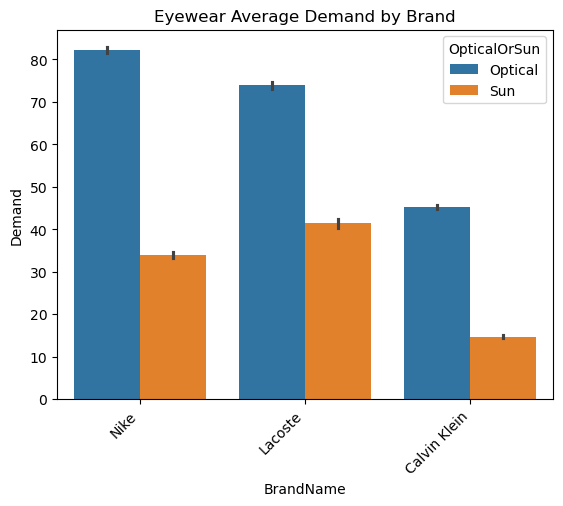

In [65]:
sns.barplot(data_4m_demand,x='BrandName',y='Demand',estimator='mean',hue='OpticalOrSun')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Brand')

Text(0.5, 1.0, 'Eyewear Average Demand by Time')

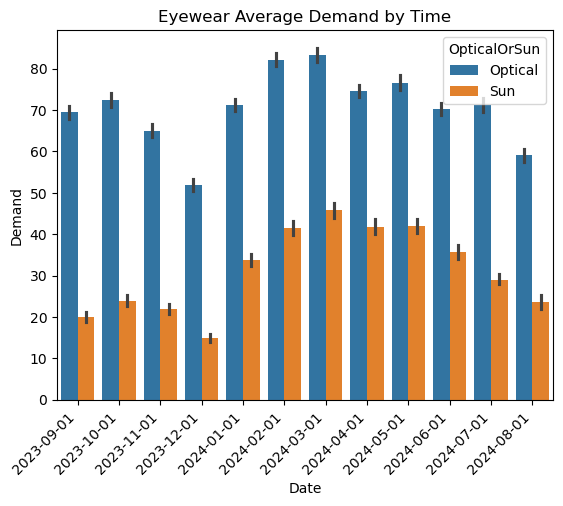

In [66]:
sns.barplot(data_4m_demand,x='Date',y='Demand',estimator='mean',hue='OpticalOrSun')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Time')

Text(0.5, 1.0, 'Eyewear Average Demand by Summer')

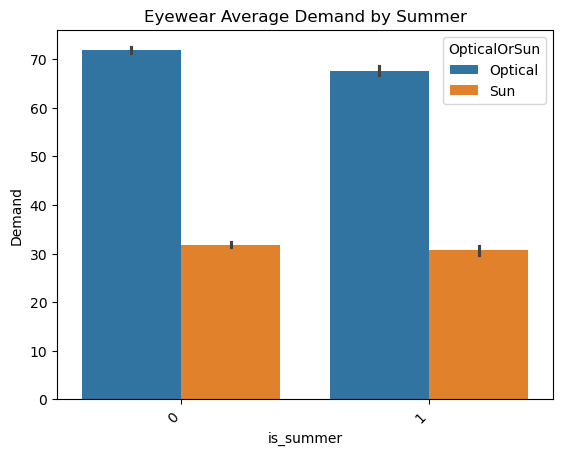

In [67]:
sns.barplot(data_4m_demand,x='is_summer',y='Demand',hue='OpticalOrSun',estimator='mean')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Summer')

Text(0.5, 1.0, 'Eyewear Average Demand by Insurance Reset')

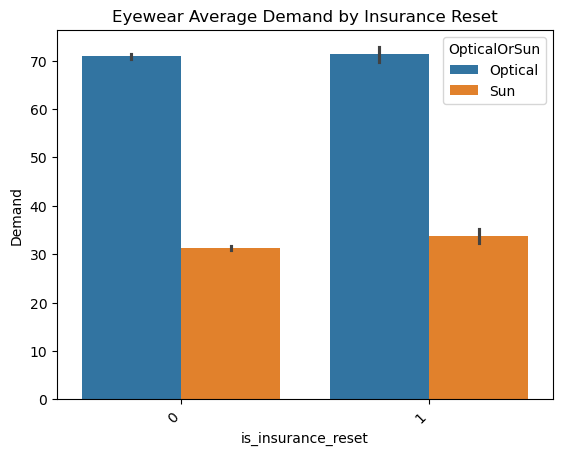

In [68]:
sns.barplot(data_4m_demand,x='is_insurance_reset',y='Demand',hue='OpticalOrSun',estimator='mean')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Insurance Reset')

Text(0.5, 1.0, 'Eyewear Average Demand by Holdiays')

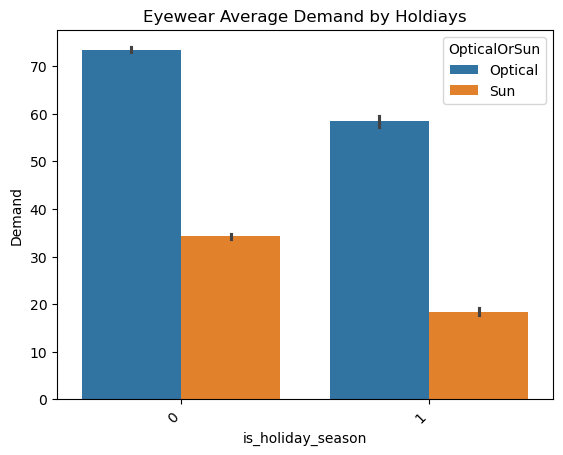

In [69]:
sns.barplot(data_4m_demand,x='is_holiday_season',y='Demand',hue='OpticalOrSun',estimator='mean')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Holdiays')

Text(0.5, 1.0, 'Eyewear Average Demand by Color')

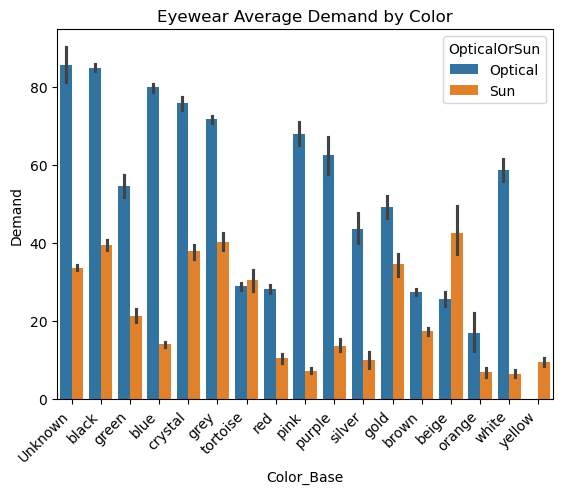

In [70]:
sns.barplot(data_4m_demand,x='Color_Base',y='Demand',estimator='mean',hue='OpticalOrSun')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Color')

Text(0.5, 1.0, 'Eyewear Average Demand by Color')

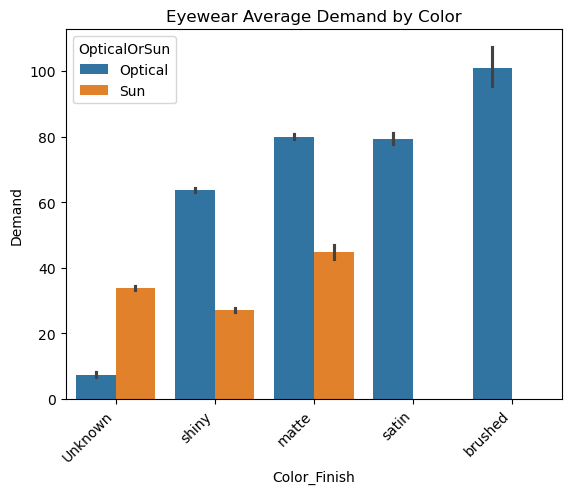

In [71]:
sns.barplot(data_4m_demand,x='Color_Finish',y='Demand',estimator='mean',hue='OpticalOrSun')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Color')

Text(0.5, 1.0, 'Eyewear Average Demand by Shape')

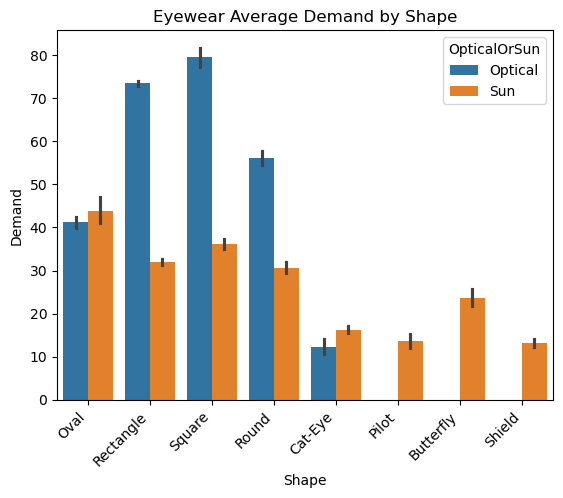

In [72]:
sns.barplot(data_4m_demand,x='Shape',y='Demand',estimator='mean',hue='OpticalOrSun')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Shape')

Text(0.5, 1.0, 'Eyewear Average Demand by Material')

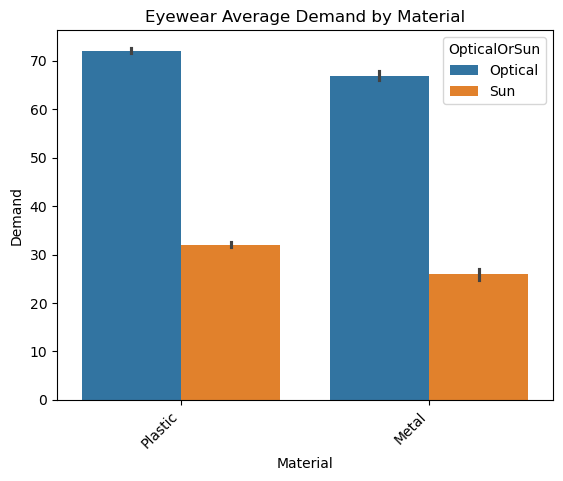

In [73]:
sns.barplot(data_4m_demand,x='Material',y='Demand',estimator='mean',hue='OpticalOrSun')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Material')